<a href="https://colab.research.google.com/github/hojoooon/PDM16/blob/main/py-tesorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


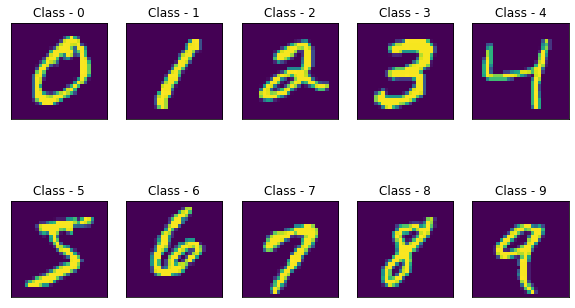

In [5]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [7]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [8]:
c1f2 = keras.models.Sequential([               
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),                 
           strides=(1,1),                      
           padding='same',                     
           activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),                                 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',                 
              loss='categorical_crossentropy',   
              metrics=['accuracy'])            

In [9]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [10]:
3*3*32+32  # c1f2.summary() 첫번째 컨볼루션 파라미터 320개 
'''
3x3 9개의 무작위 수로 필터 결정
첫번째 뉴런 32개 
각 뉴런마다 바이어스가 있으므로 총 바이어스 개수는 +32개 
'''

'\n3x3 9개의 무작위 수로 필터 결정\n첫번째 뉴런 32개 \n각 뉴런마다 바이어스가 있으므로 총 바이어스 개수는 +32개 \n'

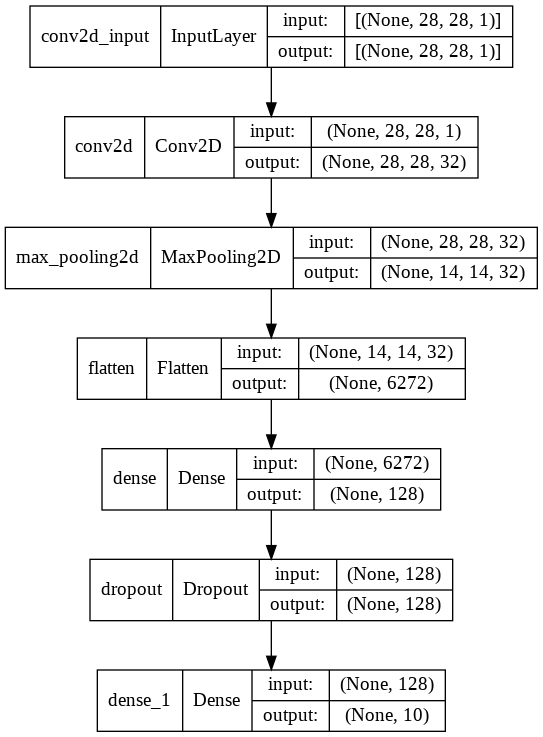

In [11]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [12]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
        validation_data = (X_test, y_test)) 

Epoch 1/20
600/600 [==============================] - 18s 9ms/step - loss: 0.2419 - accuracy: 0.9288 - val_loss: 0.0767 - val_accuracy: 0.9763
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.0560 - val_accuracy: 0.9815
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0458 - val_accuracy: 0.9848
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0412 - val_accuracy: 0.9861
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0366 - val_accuracy: 0.9873
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0348 - val_accuracy: 0.9881
Epoch

In [13]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9892


[0.044042859226465225, 0.9891999959945679]

---

## **CNN1 + FCN3**

In [14]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [15]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),                   
           strides=(1,1),                       
           filters= 32, 
           padding='same',                      
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),  
    Flatten(),                              
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [16]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [17]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2421 - accuracy: 0.9267
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0744 - accuracy: 0.9773
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0371 - accuracy: 0.9887
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0131 - accuracy: 0.9957

In [18]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0514 - accuracy: 0.9888


[0.05137050896883011, 0.9887999892234802]

## **CNN2 + FCN2**

In [19]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [20]:
c2f2 = tf.keras.models.Sequential([               
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [22]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2207 - accuracy: 0.9326
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0664 - accuracy: 0.9802
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0255 - accuracy: 0.9921
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0175 - accuracy: 0.9945
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0148 - accuracy: 0.9949

In [23]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0258 - accuracy: 0.9933


[0.02576974220573902, 0.9933000206947327]

## **CNN2 + FCN3**

In [24]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [25]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f3
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [27]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3024 - accuracy: 0.9066
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0889 - accuracy: 0.9745
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0626 - accuracy: 0.9819
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0498 - accuracy: 0.9858
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0416 - accuracy: 0.9878
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0360 - accuracy: 0.9897
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0321 - accuracy: 0.9906
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0264 - accuracy: 0.9926
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0238 - accuracy: 0.9930
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0221 - accuracy: 0.993

In [28]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9916


[0.0336865559220314, 0.991599977016449]

# **[DIY] Hidden layer에 따른 정확도**

In [29]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9892


[0.044042859226465225, 0.9891999959945679]

In [30]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9888


[0.05137050896883011, 0.9887999892234802]

In [31]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0258 - accuracy: 0.9933


[0.02576974220573902, 0.9933000206947327]

In [32]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9916


[0.0336865559220314, 0.991599977016449]

In [33]:
# Try another method!!
fcn_result = [[0.0462825782597065, 0.9890000224113464], 
 [0.052770182490348816, 0.9898999929428101], 
 [0.026600686833262444, 0.9930999875068665], 
 [0.038966186344623566, 0.9908999800682068]]

In [34]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy      # ==> c2f2 best model

[0.9890000224113464,
 0.9898999929428101,
 0.9930999875068665,
 0.9908999800682068]

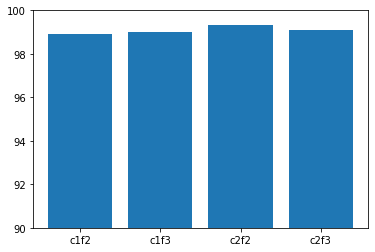

In [35]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

#plt.figure(figsize=(5,5))
plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((90,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [36]:
c2f2.save('c2f2_best.hdf5')

In [37]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0258 - accuracy: 0.9933


[0.02576974220573902, 0.9933000206947327]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [38]:
hist = c2f2.fit(X_train, y_train,  # c2f2 초기화 후 실행 (c2f2 이전에 실행된 내용과 연결될 수 있으므로 seed, 파라미터 초기화)
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0322 - val_accuracy: 0.9918
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0311 - val_accuracy: 0.9932
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0338 - val_accuracy: 0.9921
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0330 - val_accuracy: 0.9922
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0331 - val_accuracy: 0.9929
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0398 - val_accuracy: 0.9903
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0299 - val_accuracy: 0.9935
Ep

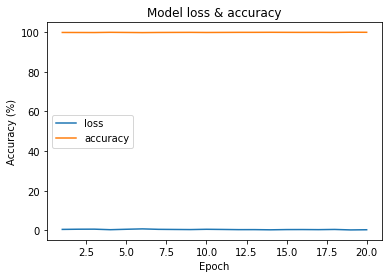

In [39]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

- validation

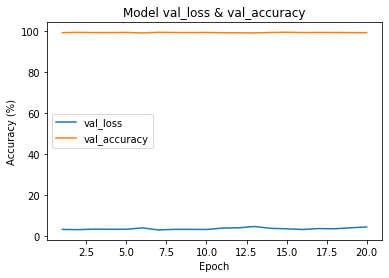

In [40]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

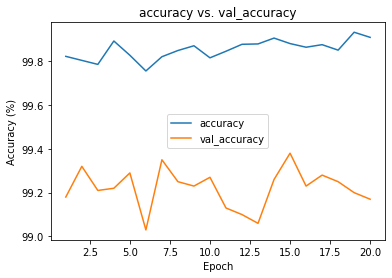

In [41]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [42]:
c2f3.save('c2f3_best.hdf5')

In [43]:
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9916


[0.0336865559220314, 0.991599977016449]

In [44]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [45]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f3
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [46]:
hist = c2f2.fit(X_train, y_train,
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0363 - val_accuracy: 0.9928
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0403 - val_accuracy: 0.9934
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0418 - val_accuracy: 0.9923
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0361 - val_accuracy: 0.9928
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0443 - val_accuracy: 0.9914
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0419 - val_accuracy: 0.9927
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0483 - val_accuracy: 0.9920


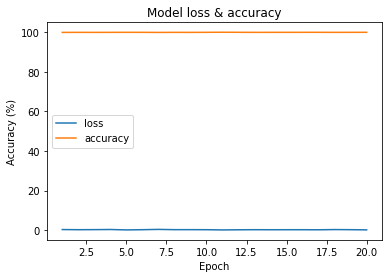

In [47]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

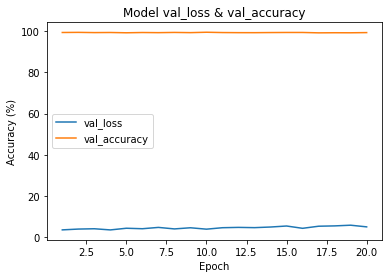

In [48]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

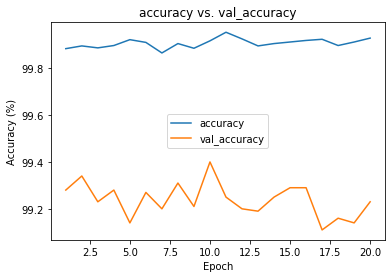

In [49]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***